# 2.2 SOO for 1D scalars

In [1]:
import numpy as np

from cyclops.object_reader import PickleManager
from cyclops.plotting import PlotManager

# Load any objects necessary
pickle_manager = PickleManager()
graph_manager = PlotManager()
true_temp_field = pickle_manager.read_file("results/disp_line_field.pickle")
grid = pickle_manager.read_file("results/disp_line_points.pickle")

field_bounds = true_temp_field.get_bounds()
sensor_bounds = field_bounds + np.array([[1], [-1]]) * 0.002

In [2]:
from cyclops.fields import VectorField
from cyclops.regressors import RBFModel
from cyclops.sensor_suite import SensorSuite
from cyclops.sensors import PointSensor


# Setup the sensor suite
def f(x):
    return 0


sensor = PointSensor(0, f, 0, np.array([[-5e10, -5e10, -5e10], [5e10, 5e10, 5e10]]), 1)
sensors = np.array([sensor] * 5)
sensor_suite = SensorSuite(VectorField(RBFModel, field_bounds), sensors)

In [3]:
from cyclops.experiment import Experiment
from cyclops.optimisers import PSOOptimiser

# Setup the experiment
optimiser = PSOOptimiser("00:00:10")
experiment = Experiment(true_temp_field, grid, optimiser)
experiment.plan_soo(
    sensor_suite,
    sensor_bounds,
)
res = experiment.design()
(
    proposed_layout,
    true_disps,
    model_disps,
    sensor_vals,
) = experiment.get_SOO_plotting_arrays(res.X)

n_gen  |  n_eval  |    f     |    S    |    w    |    c1    |    c2    |     f_avg     |     f_min    
     1 |       30 |        - |       - |  0.9000 |  2.00000 |  2.00000 |  5.334728E-11 |  4.273684E-12
     2 |       60 |  0.39361 |       2 |  0.6497 |  2.03241 |  1.96759 |  2.961354E-11 |  4.273684E-12
     3 |       90 |  0.07381 |       3 |  0.4468 |  2.03165 |  1.99199 |  1.716206E-11 |  1.982822E-12
     4 |      120 |  0.05672 |       3 |  0.4359 |  2.01932 |  2.00694 |  8.505991E-12 |  1.945434E-12
     5 |      150 | -1.5E-02 |       3 |  0.3907 |  2.00604 |  2.01798 |  5.444342E-12 |  9.500492E-13
     6 |      180 | -8.3E-03 |       3 |  0.3948 |  1.99419 |  2.03248 |  4.101049E-12 |  9.271403E-13
     7 |      210 | -1.8E-05 |       3 |  0.4000 |  1.98144 |  2.04973 |  3.635192E-12 |  8.371437E-13
     8 |      240 | -1.1E-02 |       3 |  0.3931 |  1.96689 |  2.06384 |  3.388301E-12 |  7.958057E-13
     9 |      270 | -1.0E-02 |       3 |  0.3936 |  1.95254 |  2.06861 | 

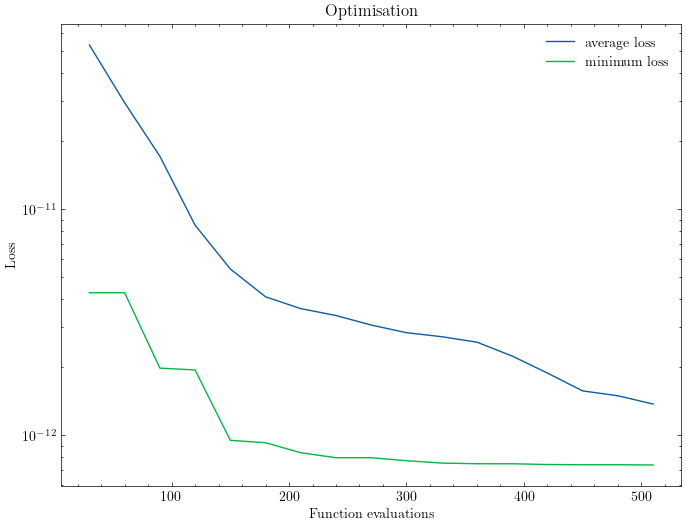

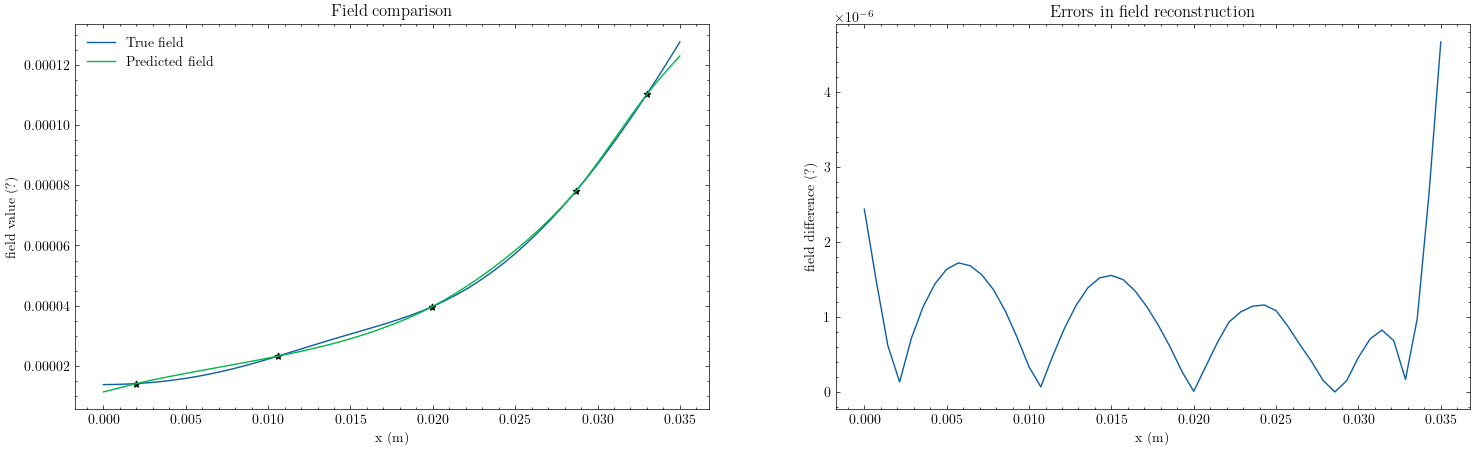

In [4]:
mag_true_disps = np.linalg.norm(true_disps, axis=1).reshape(-1, 1)
mag_model_disps = np.linalg.norm(model_disps, axis=1).reshape(-1, 1)
mag_sensor_vals = np.linalg.norm(sensor_vals, axis=1).reshape(-1, 1)

# Display the results
graph_manager.build_optimisation(res.history)
graph_manager.draw()
graph_manager.build_1D_compare(
    grid, proposed_layout, mag_sensor_vals, mag_true_disps, mag_model_disps
)